#**StateFarm 산만한 운전자 감지**

## **1. 데이터 선정이유**

제가 운전자 이미지 데이터를 선택한 이유는 다음과 같습니다.

- **첫번째**로 저는 금융권의 데이터 관련 직종에 취업을 희망합니다. 해당 경진대회는 미국의 **'보험 및 금융 회사'** 에서 주최하는 것으로 취업분야와 관련이 있다고 판단되어 해당 데이터를 선택하였습니다.

- **두번째로** 과거에 택시의 DTG(상업용 차량에 부착하는 운전기록계)를 활용하여, 위험운전을 예측하는 프로젝트를 진행한 경험이 있습니다. 때문에 이번 기회로 관련 분야의 취업에 있어서 **'시너지 효과'**를 발휘할 수 있을 것이라 생각 되었습니다.

## **2. 배경 설명**

미국 CDC 자동차 안전 본부에 따르면, 자동차 사고 5건 중 1건은 산만한 운전자들로 인해 발생합니다. 이러한 사고는 매년 425,000명의 부상자들과 3,000명의 사망자들로 이어집니다.

'산만한 운전자'는 졸음운전, 음주 운전 뿐만 아니라 운전 중 스마트폰 사용, 전화 통화 및 영상 시청 등의 사소한 행동 등이 포함됩니다.

따라서 보험회사인 'State Farm'은 대시보드 카메라를 통해 주의가 산만한 운전자들을 자동으로 감지하여, 고객을 보호하고 사고를 예방하고자 하기에 Kaggel대회를 주관하게 되었습니다.

## **3. 평가척도**

주어진 이미지 안의 운전자가 어떤 자세를 취하고 있는지를 예측해야 합니다.

운전자의 상태 **10가지** ( 안전운전, 오른손으로 문자, 오른손으로 전화, 왼손으로 문자, 왼손으로 전화, 라디오 조작, 음료수 섭취, 뒷자석에 손 뻗기, 얼굴/머리 만지기, 조수석과 대화) 중 **1개로 '분류'** 해야 합니다.

## **4. 단계적 실험 계획**

Baseline 모델을 기준으로 단계적으로 실험을 통해 성능을 높여 나갈 것 입니다.

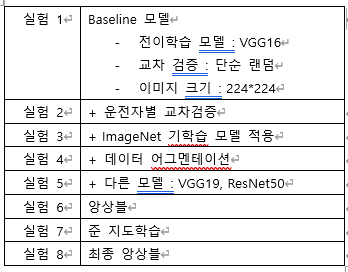

## **5. 데이터 설명**

### **train데이터 22,424개**

- c0 : 안전운전 (2489개)
- c1 : 오른손으로 문자 (2267개)
- c2 : 오른손으로 전화 (2317개)
- c3 : 왼손으로 문자 (2346개)
- c4 : 왼손으로 전화 (2326개)
- c5 : 라디오 조작 (2312개)
- c6 : 음료수 섭취 (2325개)
- c7 : 뒷좌석에 손 뻗기 (2002개)
- c8 : 얼굴, 머리 만지기 (1911개)
- c9 : 조수석과 대화 (2129개)

<br>

**26명의 운전자는 평균 인당 860장 가량의 훈련데이터를 제공했다.**

**클래스 별로는 평균 인당 86장 가량의 데이터를 제공하고 있다.**

<br>
<hr>
<br>

### **test 데이터 79726개**

**즉, 전체 102,150개의 이미지 데이터를 다뤘다.**



# **과정**

## **1. kaggle에서 데이터 불러오기**

[[Google Colab] 코랩에서 Kaggle dataset 검색 및 구글 드라이브에 다운로드](https://dschloe.github.io/kaggle/colab_with_drive/)

In [ ]:
# kaggle 설치

!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# colab 마운트하기

from google.colab import drive # 패키지 불러오기 

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data


In [ ]:
# Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4) 해결책
# kaggel 파일 폴더 형태로 불러온다.

!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
# Kaggle 데이터 다운로드

#!kaggle competitions download -c state-farm-distracted-driver-detection

100% 4.00G/4.00G [00:43<00:00, 17.2MB/s]
100% 4.00G/4.00G [00:43<00:00, 99.1MB/s]


In [ ]:
# list 확인

!ls

driver_imgs_list.csv  imgs


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs

/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs


In [ ]:
!ls

test  train  valid


In [ ]:
# 압축해제하기

#!unzip state-farm-distracted-driver-detection.zip

In [ ]:
%cd "{requirement_PATH}"

/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm


In [ ]:
!pip install -r requirements.txt

In [ ]:
# 경로 다시 이동

%cd "{PROJECT_PATH}"

/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data


## **2. 데이터 확인**

In [ ]:
import matplotlib.pyplot as plt
from glob import glob
import os
import cv2

In [ ]:
# read_image
def read_image(path):
  image=cv2.imread(path, cv2.IMREAD_COLOR)
  imgge= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image


# 이미지 파일 경로 지정하기

data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs'

# train데이터 클래스별 10개의 임의의 이미지를 시각화하기
labels = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
col_to_kor={
    'c0' : '안전운전',
    'c1' : '오른손으로 문자',
    'c2' : '오른손으로 전화',
    'c3' : '왼손으로 문자',
    'c4' : '왼손으로 전화',
    'c5' : '라디오 조작',
    'c6' : '음료수 섭취',
    'c7' : '뒷좌석에 손 뻗기',
    'c8' : '얼굴, 머리 만지기',
    'c9' : '조수석과 대화',
}

for label in labels:
  f, ax = plt.subplots(figsize=(12,10))
  files = glob('{}/train/{}/*jpg'.format(data_dir, label))

  # 총 9개의 이미지를 시각화한다.

  print('\t\t\t\t# {} : {}'.format(label, col_to_kor[label]))

  for x in range(9):
    plt.subplot(3,3,x+1)
    image = read_image(files[x])
    plt.imshow(image)
    plt.axis('off')

  plt.show()
  

Output hidden; open in https://colab.research.google.com to view.

## **3. Baseline 모델**

### **3-0. 모델 정의**

In [ ]:
# import
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# VGG16 모델 정의

def get_model():

  # 최상위 전결층을 제회한 vgg16 모델 불러오기
  base_model = VGG16(include_top= False, weights=None, input_shape=(224,224,3))

  # 최상위 전결층 정의하기
  X = Flatten()(base_model.output)
  X = Dense(2048, activation='relu')(X)
  X = Dropout(0.5)(X)
  X = Dense(2048, activation='relu')(X)
  X = Dropout(0.5)(X)
  output = Dense(10, activation='softmax')(X) # 다중분류이므로 softmax 함수 사용한다.

  model = Model(inputs=base_model.input, outputs=output)

  # SGD optimizer를 사용하여, 모델 compile하기

  sgd = SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

### **3-1. 이미지 전처리**

In [ ]:
"""
train 데이터와 valid 데이터는 임의로 Google Drive에서 나누었다. 
(비율 train = 0.9 , valid = 0.1)

"""

"""
ImageDateGenerator를 사용하게 위해 test 폴더 아래에 imgs라는 폴더를 하나 더 만들어서, 데이터를 옮겼다.

"""

In [ ]:
cd test/

/content/drive/My Drive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs/test


In [ ]:
!mkdir imgs
!mv img_* imgs

In [ ]:
# 파라미터 설정

train_path = '/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs/train'
test_path =  '/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs/test'

In [ ]:
# 이미지 데이터 전처리

from tensorflow.keras.preprocessing. image import ImageDataGenerator

# 이미지 데이터 전처리를 수행하는 함수 정의

datagen = ImageDataGenerator()

# 특정 폴더에 위치해 있는 훈련/ 검증 데이터를 실시간으로 읽어온다

train_generator = datagen.flow_from_directory(
            directory= train_path,
            target_size=(224,224),
            batch_size=8,
            class_mode='categorical',
            seed=2018)

valid_generator = datagen.flow_from_directory(
            directory='/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs/valid',
            target_size=(224,224),
            batch_size=8,
            class_mode='categorical',
            seed=2018)


# 테스트 데이터 예측용 데이터 생성기를 정희한다.

test_generator = datagen.flow_from_directory(
            directory='/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/imgs/test',
            target_size=(224,224),
            batch_size=1,
            class_mode=None,
            shuffle=False)

Found 20180 images belonging to 10 classes.
Found 2244 images belonging to 10 classes.
Found 13843 images belonging to 1 classes.


### **3-2. 교차검증 준비**

In [ ]:
# 교차검증 평가 준비
# 5-fold stratifiedkfold 기법

"""

from glob import glob
import numpy as np
import subprocess
import os

def generate_split():
  # 이미지 생성기를 위하여 임시 훈련/검증 폴더를 생성한다.
  def _generate_temp_folder(root_path):
    os.mkdir(root_path)
    for i in range(n_class):
      os.mkdir('{}/c{}'.format(root_path, i))
  _generate_temp_folder(temp_train_fold)
  _generate_temp_folder(temp_valid_fold)

  # 임시 훈련/검증 폴더에 데이터를 랜덤하게 복사한다.

  train_samples = 0
  valid_samples = 0
  for label in labels:
    files = glob('{}/{}/*jpg'.format(train_path, label))
    for fl in files:
        cmd = 'cp {} {}/{}/{}'
        if np.random.randint(nfolds) != 1:
            # 데이터의 4/5를 훈련 데이터에 추가한다
            cmd = cmd.format(fl, temp_train_fold, label, os.path.basename(fl))
            train_samples += 1
        else:
            # 데이터의 1/5를 검증 데이터에 추가한다
            cmd = cmd.format(fl, temp_valid_fold, label, os.path.basename(fl))
            valid_samples += 1
        # 원본 훈련 데이터를 임시 훈련/검증 데이터에 복사한다
        subprocess.call(cmd, stderr=subprocess.STDOUT, shell=True)

  # 훈련/검증 데이터 개수를 출력한다
    print('# {} train samples | {} valid samples'.format(train_samples, valid_samples))
    return train_samples, valid_samples

"""

### **3-3. 모델 학습**



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import shutil


print('# Train Model')

# 이미지 데이터 전처리를 수행하는 함수를 정의한다
# datagen = ImageDataGenerator()

# 테스트 데이터를 불러오는 ImageGenerator를 생성한다.

"""
test_generator = datagen.flow_from_directory(
          directory= test_path,
          target_size=(224,224),
          batch_size=1,
          class_mode=None,
          shuffle=False)
"""

# test_id = [os.path.basename(fl) for fl in glob('{}/imgs/*.jpg'.format(test_path))]

"""
# 5-Fold 교차 검증을 진행한다.

for fold in range(5):
  # 새로운 모델을 정의한다
  model = get_model()

  # 훈련/검증 데이터를 생성한다
  train_samples, valid_samples = generate_split()

  # 훈련/검증 데이터 생성기를 정의한다.

  train_generator = datagen.flow_from_directory(
            directory='/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/train',
            target_size=(224,224),
            batch_size=8,
            class_mode='categorical',
            seed=2018)
  
  valid_generator = datagen.flow_from_directory(
            directory='/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/StateFarm/data/valid',
            target_size=(224,224),
            batch_size=8,
            class_mode='categorical',
            seed=2018)
""" 
#weight_path = '../cache/{}/weight.fold_{}.h5'.format(suffix, fold)
#callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=0),
#        ModelCheckpoint(weight_path, monitor='val_loss', save_best_only=True, verbose=0)]



# 모델을 학습한다. val_loss 값이 3 epoch 연속 개악되면, 학습을 멈추고 최적 weight를 저장한다
model.fit_generator(
      train_generator,
      #steps_per_epoch=train_samples/8,
      epochs=10,
      validation_data=valid_generator,
      #validation_steps=valid_samples/8,
      shuffle=True,
      #callbacks=callbacks,
      verbose=1)

# Train Model
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


2523/2523 [==============================] - 3391s 1s/step - loss: 1.0888 - accuracy: 0.6260 - val_loss: 0.4384 - val_accuracy: 0.8627
Epoch 2/10
2523/2523 [==============================] - 385s 153ms/step - loss: 0.4912 - accuracy: 0.8440 - val_loss: 0.2390 - val_accuracy: 0.9207
Epoch 3/10
2523/2523 [==============================] - 384s 152ms/step - loss: 0.2907 - accuracy: 0.9052 - val_loss: 0.1534 - val_accuracy: 0.9545
Epoch 4/10
2523/2523 [==============================] - 384s 152ms/step - loss: 0.1874 - accuracy: 0.9412 - val_loss: 0.0974 - val_accuracy: 0.9728
Epoch 5/10
2523/2523 [==============================] - 384s 152ms/step - loss: 0.1317 - accuracy: 0.9599 - val_loss: 0.0981 - val_accuracy: 0.9701
Epoch 6/10
2523/2523 [==============================] - 384s 152ms/step - loss: 0.1010 - accuracy: 0.9689 - val_loss: 0.0562 - val_accuracy: 0.9831
Epoch 7/10
2523/2523 [==============================] - 384s 152ms/step - loss: 0.0788 - accuracy: 0.9752 - val_loss: 0.0465 

### **K-fold를 적용하지 않고, 에폭 10으로 훈련한 결과**

- loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0461 - val_accuracy: 0.9875

훈련에서 꽤 좋은 성능을 보임을 알 수 있다.

### **교차검증을 적용하고 에폭 1로 모델을 학습한 결과**

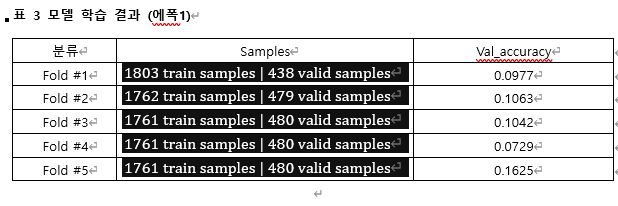

- **좋지 않은 성능을 보임을 알 수 있다**

- **에폭을 10으로 설정한 위의 결과를 보면, 만약 에폭수를 늘렸다면 더 좋은 결과가 나올 수도 있었을 것이라 예상된다**

## **4. 캐글 업로드**

### **4-1. 캐글 업로드**

In [ ]:
# 테스트 데이터에 대한 예측값을 생성한다.

preds = model.predict_generator(
                test_generator,
                #steps=len(test_id),
                verbose=1)

    9/13843 [..............................] - ETA: 3:00

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


13843/13843 [==============================] - 124s 9ms/step


In [ ]:
result = pd.DataFrame(preds, columns=labels)
result.loc[:, 'img'] = pd.Series(test_id, index=result.index)

In [ ]:
#sub_file = '../subm/vgg16.baseline/f{}.csv'.format(fold)
result.to_csv('vgg16_baseline.csv', index=False)

In [ ]:
# 캐글에 제출하기

submit_cmd = 'kaggle competitions submit -c state-farm-distracted-driver-detection -f {} -m vgg16.baseline.fold{}'.format(sub_file, suffix, fold)
subprocess.call(submit_cmd, stderr=subprocess.STDOUT, shell=True)

# 5-Fold 교차 검증 과정에서 생성한 훈련/검증 데이터를 삭제한다
shutil.rmtree(temp_train_fold)
shutil.rmtree(temp_valid_fold)

### **test 데이터에 모델 적용하고 캐글에 제출한 결과**

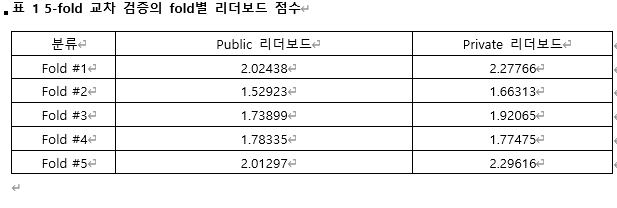

### **4-2. 앙상블**

In [ ]:
print('# Ensemble')

# 5-Fold 교차 검증의 결과물을 단순 앙상블한다
ensemble = 0
for fold in range(5):
    ensemble += pd.read_csv('../subm/vgg16.baseline/f{}.csv'.format(fold), index_col=-1).values * 1. / 5
ensemble = pd.DataFrame(ensemble, columns=labels)
ensemble.loc[:, 'img'] = pd.Series(test_id, index=ensemble.index)
sub_file = '../subm/vgg16.baseline/ens.csv'
ensemble.to_csv(sub_file, index=False)

# 캐글에 제출한다
submit_cmd = 'kaggle competitions submit -c state-farm-distracted-driver-detection -f {} -m vgg16.baseline.ensemble'.format(sub_file)
subprocess.call(submit_cmd, stderr=subprocess.STDOUT, shell=True)

### **결과**

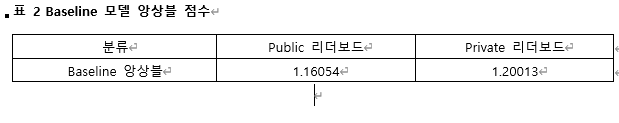

## **5.Requirements.txt 만들고, 학습된 모델은 저장해보기**

### **5-1. requirements.txt 만들기**

In [ ]:
# pip freeze > requirements.txt

### **5-2 학습된 모델 저장하기**

In [ ]:
#훈련된 딥러닝 모델 저장
# Save the entire model to a HDF5 file

from keras.models import load_model

model_custom.save('Mountain_Forest_binary_test.h5')

In [ ]:
# from colab to browser download

from google.colab import files
files.download('Mountain_Forest_binary_test.h5')

In [ ]:
# 훈련된 딥러닝 모델 불러오기

from keras.models import load_model

model_load = load_model('Mountain_Forest_binary_test.h5')

### **5-3 새로운 이미지에 모델 적용해보기**

In [ ]:
# 새로운 데이터로 딥러닝 모델에 적용해보기

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
test_image1 = image.load_img('img_1.jpg', target_size = (224,224))
test_image2 = image.img_to_array(test_image1)
test_image2 = np.expand_dims(test_image2, axis = 0)
result_example = model.predict(test_image2) # 불러온 model 이름으로 설정하는거 주의하자.
training_set.class_indices
if result_example[0][0] >= 0.5:
  prediction = 'mountain'
else:
  prediction = 'forest'

origin_image = image.load_img('img_1.jpg')
plt.imshow(origin_image)
print('  => predict = ', result[0][0], ', class = ', prediction)

### **결과**

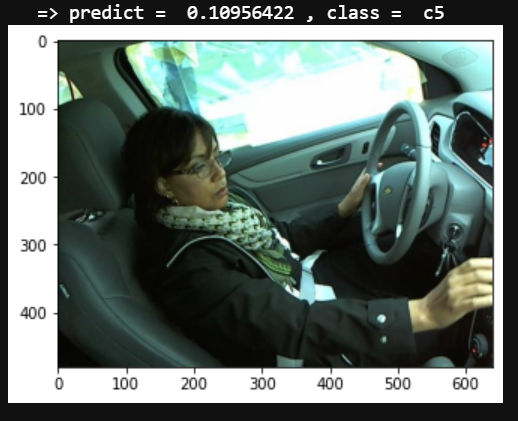

**운이 좋게도 결과가 좋게 나왔다.(오른손으로 라디오 조작)**

## **6. 활용방안**

- 기존의 자동차 보험은 천편일률적으로 보험료를 계산한다.

- 초개인화 시대에 맞게, 고객 한명 한명에게 맞춰진 보험 상품을 출시한다면 시장에서 게임체인저 역할을 할 수 있을 것으로 생각된다.

- 따라서, 딥러닝 기술을 활용하여 운전자의 평소 운전습관을 판단 및 기록하고 이를 토대로 보험료를 산정하는 방안을 제시하여 본다.

- 안전운전을 통해 교통사고로 인한 피해를 줄여 더 좋은 사회를 만들어 나가거나, 과실을 따질 때 해당 정보를 이용하는 것도 좋은 방법이 될 수 있다고 생각합니다.

## **7. 느낀점 및 아쉬운점**

- 개인적으로 대량의 이미지 데이터를 다루기 위해서는 우선 좋은 조건의 소프트웨어, 하드웨어적 환경이 충분히 구성되어 있어야 한다는 것을 절실하게 느꼈다.

- 에폭을 1로 했는데도, 학습하고 test 데이터에 적용하는데 시간이 너무 오래 걸렸다.
이 때문에, 앞서 세웠던 실험계획을 지키지 못한 것이 아쉽다.

- 에폭수를 많이 늘리지 못한 점이 아쉽다.
